# 목차

```ruby
1. DataLoader shape 구하기
2. DataLoader flatten 하기
3. torchvision.datasets으로 .train_data 확인하기

4. avg_cost 구하기
5. with torch.no_grad() 구현하기
    - .argmax == y (acc 구하기)
    - 1개만 랜덤으로 뽑아서 시각화하기
```


1.
```sage
for x, y in data_loader:
    print(x.shape, y.shape)
```

2.
```sage
# 1번 방법
torch.flatten(x[0], start_dim=2) # 배치 제외 평탄화

# 2번 방법
torch.flatten(mnist_train.train_data, start_dim=1) # 배치 제외 평탄화

# 3번 방법
mnist_train.view(-1, 28 * 28) # 배치 제외 평탄화
```

3.
```sage
mnist_train = torchvision.datasets.MNIST(root= , train=, transform=, download=)
mnist_train.train_data // train_labels
```

4.
```sage
for epoch in range():
    avg_cost = 0
    tot_batch = len(data_loader)
    
    for X, Y in data_loader:
        
        avg_cost += cost / tot_batch
```

5 - (1).
```sage
with torch.no_grad():
    
    acc = (torch.argmax(pred, 1) == y_test).float().mean()
```

5 - (2).
```sage
with torch.no_grad()
    
    # test시에는 batch가 필요없으므로
    r = random.randint(0, len(mnist_test) - 1)
    X_ran = X_test[r]
    y_ran = y_test[r]
```

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import torchvision

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

random.seed(42)
torch.manual_seed(42)
if device == 'cuda':
    torch.cuda.manual_seed_all(42)

In [11]:
mnist_train = torchvision.datasets.MNIST(root='MNIST_data/',
                                        train=True,
                                        transform=torchvision.transforms.ToTensor(),
                                        download=True)
mnist_test = torchvision.datasets.MNIST(root='MNIST_data/',
                                       train=False,
                                       transform=torchvision.transforms.ToTensor(),
                                       download=True)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=100,
                                         shuffle=True,
                                         drop_last=True)

In [84]:
mnist_train.train_data.shape, mnist_train.train_labels.shape, mnist_test.test_data.shape

/home/jaehoon/anaconda3/envs/torch_env/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


(torch.Size([60000, 28, 28]), torch.Size([60000]), torch.Size([10000, 28, 28]))

In [35]:
for x, y in data_loader:
    print(x.shape, y.shape)
    break

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [74]:
# DataLoader shape 구하기, Class 개수 구하기
linear = nn.Linear(torch.flatten(x[0]).shape[0], len(y.unique())).to(device)
optm = torch.optim.SGD(linear.parameters(), lr=1e-3)
loss = nn.CrossEntropyLoss().to(device)

In [76]:
for epoch in range(15):
    avg_cost = 0
    tot_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = torch.flatten(X, start_dim=1).to(device)
        Y = Y.to(device)
        
        optm.zero_grad()
        z = linear(X)
        cost = loss(z, Y)
        cost.backward()
        optm.step()
        
        avg_cost += cost / tot_batch
        
    print('epoch : ', epoch+1, 'avg_cost', avg_cost.item())

epoch :  1 avg_cost 0.8675121665000916
epoch :  2 avg_cost 0.8185426592826843
epoch :  3 avg_cost 0.7785223126411438
epoch :  4 avg_cost 0.7451493740081787
epoch :  5 avg_cost 0.7168310880661011
epoch :  6 avg_cost 0.6924827694892883
epoch :  7 avg_cost 0.671276330947876
epoch :  8 avg_cost 0.6526309847831726
epoch :  9 avg_cost 0.63608717918396
epoch :  10 avg_cost 0.6212705969810486
epoch :  11 avg_cost 0.6079385280609131
epoch :  12 avg_cost 0.5958525538444519
epoch :  13 avg_cost 0.5848321914672852
epoch :  14 avg_cost 0.5747438073158264
epoch :  15 avg_cost 0.5654541254043579


In [98]:
# test
with torch.no_grad():
    X_test = torch.flatten(mnist_test.test_data, start_dim=1).float().to(device)
    y_test = mnist_test.test_labels.to(device)
    
    pred = linear(X_test)
    corr_pred = torch.argmax(pred, 1) == y_test
    acc = corr_pred.float().mean()
    
    print(acc.item())

0.8722999691963196


label :  8
pred :  8


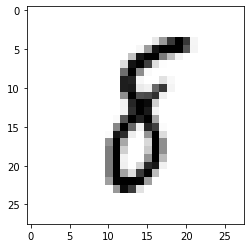

In [109]:
import matplotlib.pyplot as plt

with torch.no_grad():
    X_test = torch.flatten(mnist_test.test_data, start_dim=1).float().to(device)
    y_test = mnist_test.test_labels.to(device)
    
    r = random.randint(0, len(mnist_test) - 1)
    X_r = X_test[r] # 1개만 뽑았으므로 1차원임 주의
    y_r = y_test[r] 
    
    single_pred = linear(X_r)
    print('label : ', y_r.item())
    print('pred : ', torch.argmax(single_pred).item())
    
    plt.imshow(mnist_test.test_data[r].view(28, 28), cmap='Greys')
    plt.show()